In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def importdata():
    balance_data = sns.load_dataset('iris')
    print("Dataset Length:", len(balance_data))
    print("Dataset Shape:", balance_data.shape)
    print("Dataset Head:\n", balance_data.head())
    return balance_data

In [5]:
data = importdata()

Dataset Length: 150
Dataset Shape: (150, 5)
Dataset Head:
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['species'] = encoder.fit_transform(data['species'])

In [28]:
def splitdataset(data):
    X = data.iloc[:, :4].values
    Y = data.iloc[:, 4].values
    X_train, X_test, y_train, y_test = train_test_split(X, Y,
    test_size=0.3, random_state=100)
    return X_train, X_test, y_train, y_test

In [29]:
x_train, x_test, y_train, y_test = splitdataset(data)

In [33]:
def train_using_gini(x_train, y_train):
    clf_gini = DecisionTreeClassifier(criterion="gini",
    random_state=42, max_depth=3, min_samples_leaf=5)

    clf_gini.fit(x_train, y_train)
    return clf_gini

def train_using_entropy(x_train, y_train):
    clf_entropy = DecisionTreeClassifier(criterion="entropy",
    random_state=42, max_depth=3, min_samples_leaf=5)
    clf_entropy.fit(x_train, y_train)
    return clf_entropy

In [34]:
giniModel = train_using_gini(x_train, y_train)
entropyModel = train_using_entropy(x_train, y_train)

In [36]:
y_pred_gini = giniModel.predict(x_test)
y_pred_entropy = entropyModel.predict(x_test)

In [37]:
def evaluateModel(y_pred, y_test):
    accuracy = accuracy_score(y_pred, y_test)
    print(f'Accuracy : {accuracy}')
    matrix = confusion_matrix(y_pred, y_test)
    print(matrix)
    print('--------------------------------')
    report = classification_report(y_pred, y_test)
    print(report)

In [38]:
print('Gini Index')
print('--------------------------')
evaluateModel(y_pred_gini, y_test)
print('Entropy')
print('--------------------------')
evaluateModel(y_pred_entropy, y_test)

Gini Index
--------------------------
Accuracy : 0.9555555555555556
[[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]
--------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.91      0.91        11
           2       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

Entropy
--------------------------
Accuracy : 0.9555555555555556
[[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]
--------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.91      0.91        11
           2       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0

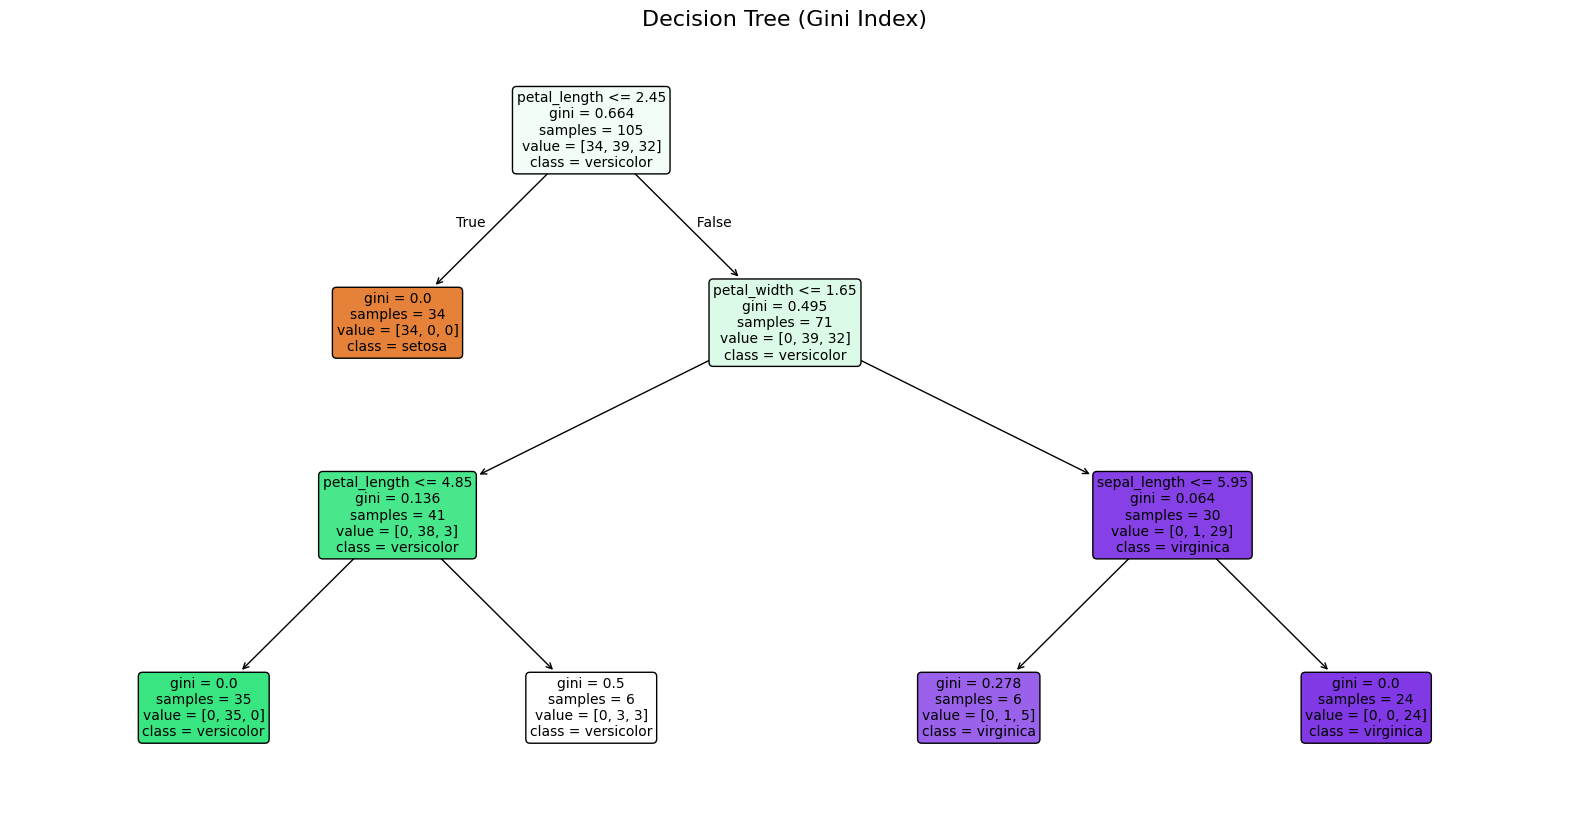

In [39]:
# Visualize Gini tree
plt.figure(figsize=(20,10))
plot_tree(giniModel, 
          feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
          class_names=['setosa', 'versicolor', 'virginica'],
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title('Decision Tree (Gini Index)', fontsize=16)
plt.show()

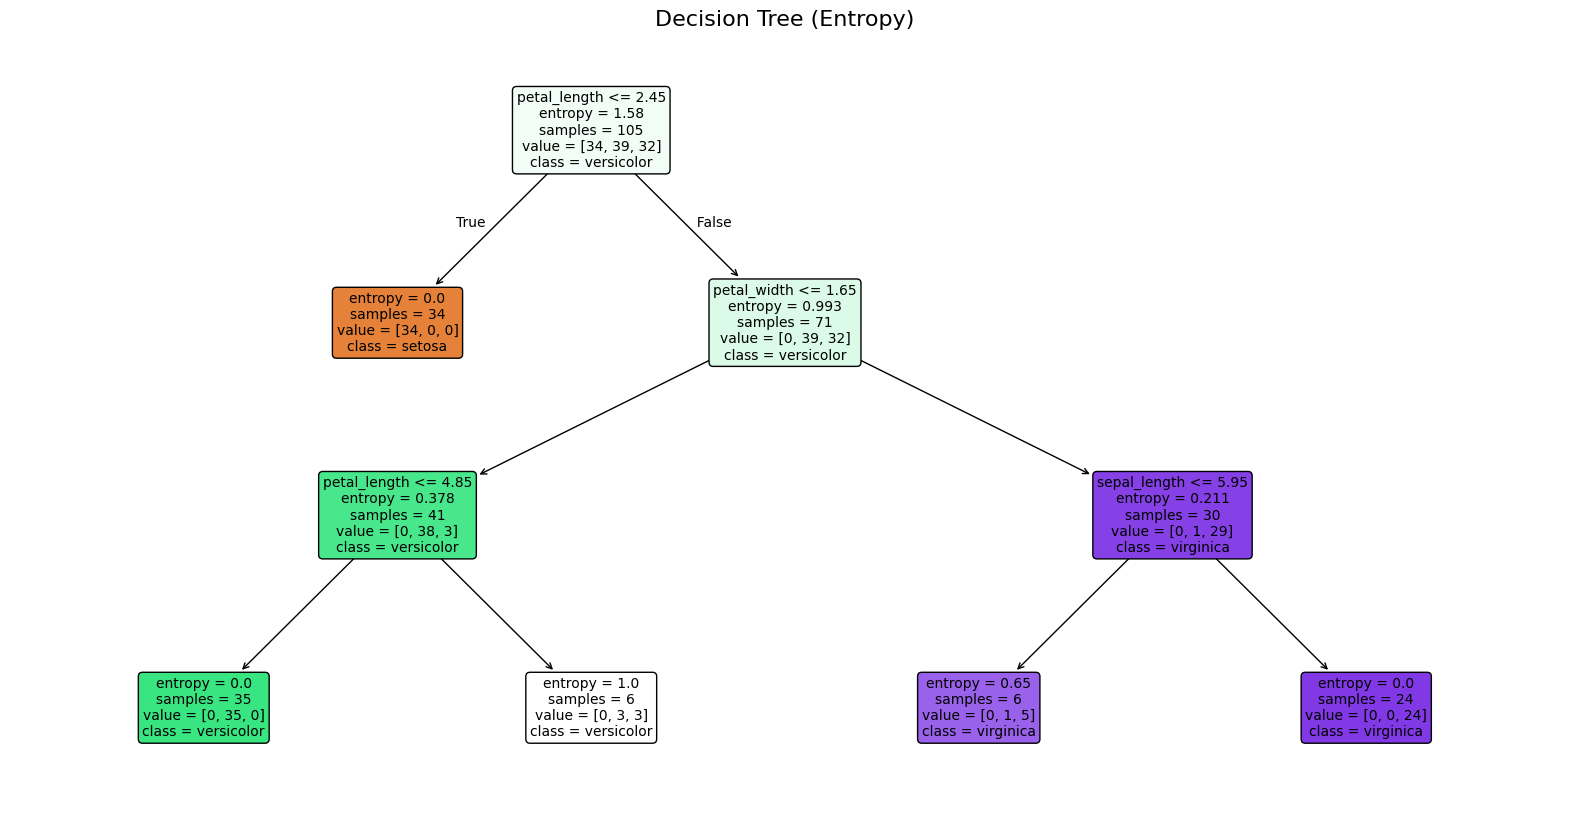

In [40]:
# Visualize Entropy tree
plt.figure(figsize=(20,10))
plot_tree(entropyModel, 
          feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
          class_names=['setosa', 'versicolor', 'virginica'],
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title('Decision Tree (Entropy)', fontsize=16)
plt.show()